In [1]:
#Library
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv

In [2]:
#functions

def NelsonSiegelModel(t, beta0, beta1, beta2,tau):
  NSModel=beta0+beta1*(tau/t*(1-np.exp(-t/tau)))+beta2*(tau/t*(1-np.exp(-t/tau))-np.exp(-t/tau))
  return NSModel

def SvenssonModel(t,beta0,beta1,beta2,beta3,tau1,tau2):
  SVModel=beta0+\
           beta1*(tau1/t*(1-np.exp(-t/tau1)))+\
           beta2*(tau1/t*(1-np.exp(-t/tau1))-np.exp(-t/tau1))+\
           beta3*(tau2/t*(1-np.exp(-t/tau2))-np.exp(-t/tau2))
  return SVModel

Currency 1: EURO Data

In [3]:
Filepath = 'EURData.csv'
T_crncy1=[]
Zero_crncy1=[]
with open(Filepath) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    for row in csv_reader:
        T_crncy1.append(str(row[0]))
        Zero_crncy1.append(str(row[1]))
T_crncy1=(np.array(T_crncy1[1:])).astype(float)
Zero_crncy1=(np.array(Zero_crncy1[1:])).astype(float)

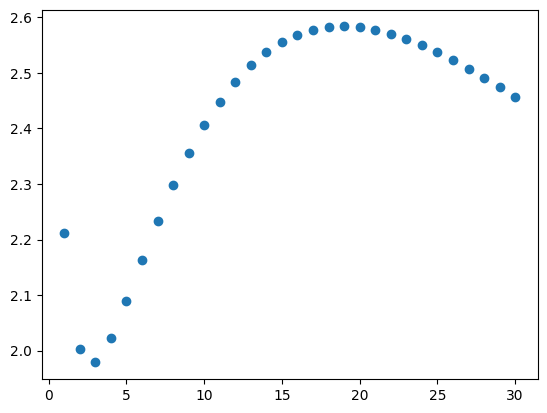

In [4]:
plt.scatter(T_crncy1,Zero_crncy1)

In [5]:
poptSV_crncy1, pcovSV_crncy1 = curve_fit(SvenssonModel, T_crncy1, Zero_crncy1)
print(poptSV_crncy1)


[ 0.94592039  1.97088616 -0.42377731  5.26003167  0.85504444 11.15727812]


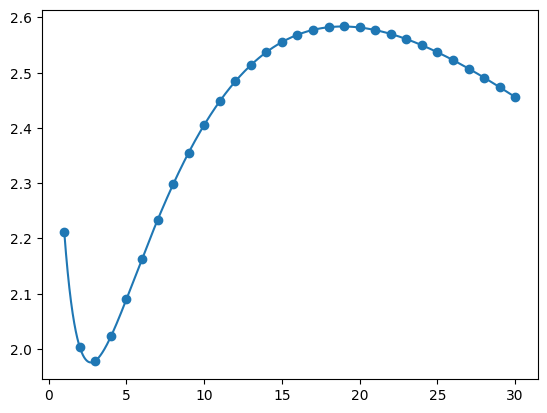

In [6]:
t_grid_crncy1=np.arange(start=min(T_crncy1),stop=max(T_crncy1),step=1/360)
plt.scatter(T_crncy1,Zero_crncy1)
plt.plot(t_grid_crncy1,SvenssonModel(t_grid_crncy1,poptSV_crncy1[0],poptSV_crncy1[1],poptSV_crncy1[2],poptSV_crncy1[3],poptSV_crncy1[4],poptSV_crncy1[5]))

Currency 2: USD Data

In [7]:
# USD Data (Crncy1) 24th Dec 24
Filepath = 'USDData.csv'
T_crncy2=[]
Zero_crncy2=[]
with open(Filepath) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    for row in csv_reader:
        T_crncy2.append(str(row[0]))
        Zero_crncy2.append(str(row[1]))
T_crncy2=(np.array(T_crncy2[1:])).astype(float)
Zero_crncy2=(np.array(Zero_crncy2[1:])).astype(float)

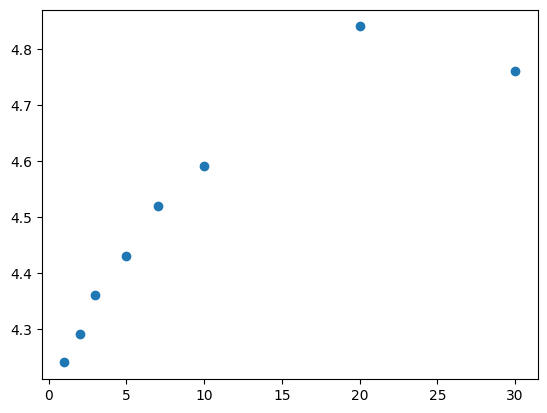

In [8]:
plt.scatter(T_crncy2,Zero_crncy2)

In [9]:
poptNS_crncy2, pcovNS_crncy2 = curve_fit(NelsonSiegelModel, T_crncy2, Zero_crncy2)
print(poptNS_crncy2)

[-2847.30713076  2851.49234089  2922.3291028    631.74135879]


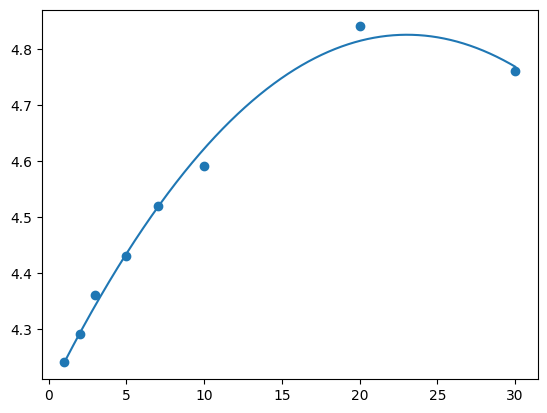

In [10]:
t_grid_crncy2=np.arange(start=min(T_crncy2),stop=max(T_crncy2),step=1/360)
plt.scatter(T_crncy2,Zero_crncy2)
plt.plot(t_grid_crncy2,NelsonSiegelModel(t_grid_crncy2,poptNS_crncy2[0],poptNS_crncy2[1],poptNS_crncy2[2],poptNS_crncy2[3]))

Forward term structure (UIP)

In [11]:
# Spot Exchange rate [crncy1/crncy2].
S=(1.0386+1.0411)/2
Delta_T=1/360
Time_horizon=1
T_FX_grid=np.arange(Delta_T,Time_horizon,Delta_T)
Zero_crncy1=SvenssonModel(T_FX_grid,poptSV_crncy1[0],poptSV_crncy1[1],poptSV_crncy1[2],poptSV_crncy1[3],poptSV_crncy1[4],poptSV_crncy1[5])/100
Zero_crncy2=NelsonSiegelModel(T_FX_grid,poptNS_crncy2[0],poptNS_crncy2[1],poptNS_crncy2[2],poptNS_crncy2[3])/100
F_theta=S*np.exp((Zero_crncy2-Zero_crncy1)*T_FX_grid)

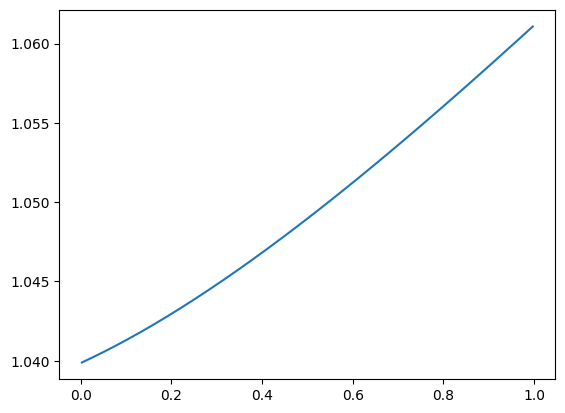

In [12]:
plt.plot(T_FX_grid,F_theta)

In [13]:
F_MKT_1Y=(1.060371+1.063189)/2
print(F_theta[-1])
print(F_MKT_1Y)
gap=F_MKT_1Y-F_theta[-1]
print(gap)

1.0610845149034145
1.06178
0.0006954850965854575
